# M3: Assignment

<br>**Enrico Borriello**</br>
<br>School of Complex Adaptive System</br>
<br>Arizona State University</br>
<br></br>
<br>**Latest update:** Spring 2025</br>

## Assignment

Assume that the recovered individuals $R(t)$ of the SIR model can become susceptible again at a rate equal to $l R(t)$, where $l$ -'immunity loss rate' in what follows- is a new parameter in the model. Modify the equations of the SIR model accordingly. Modify the Jupiter notebook for this module, and use it to study the modified system for varying values of $l$ between zero and 1.

**Question 1:** What are the equations of the modified model?

**Plot 1:** Show the behavior of $S(t)$, $I(t)$, and $R(t)$ for a contact rate of 0.001, a recovery rate of 0.1, an immunity loss rate of 0.05, and time between zero and 100.

**Question 2:** What can you say about the number of infected individuals $I(t)$ as you vary the immunity loss rate? (Keep contact rate = 0.001, and recovery rate = 0.1)

**Question 3:** What is the greatest value of the immunity loss rate for which $I(t)$ is less than 10% of the entire population after time = 100? (Use contact rate = 0.001, and recovery rate = 0.1.)

## Solution

### Answer to Question 1

<table>
<tr>
</tr>
<tr>
<td>

$$ \frac{dS}{dt} = -cSI +lR $$

$$ \frac{dI}{dt} = cSI -rI $$

$$ \frac{dR}{dt} = rI -lR $$

</td>
<td>
    
</td>
<td>
    
</td>
<td>

<img src="M3_fig2.png" width= "300">

</td>
</tr>
</table>

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
contact_rate = 0.001
recovery_rate = 0.1
immunity_loss_rate = 0.05

In [3]:
# initial conditions
# total population size = 1000
S0 = 999
I0 = 1
R0 = 0
x0 = [S0,I0,R0]

In [4]:
# ODEs
def odes(x,t):
    S = x[0]
    I = x[1]
    R = x[2]
    dSdt = -contact_rate*I*S + immunity_loss_rate*R
    dIdt = contact_rate*I*S -recovery_rate*I
    dRdt = recovery_rate*I - immunity_loss_rate*R
    return [dSdt,dIdt,dRdt]

In [5]:
t = np.linspace(0,100,1000)
x = odeint(odes,x0,t)

S = x[:,0]
I = x[:,1]
R = x[:,2]

### Plot 1

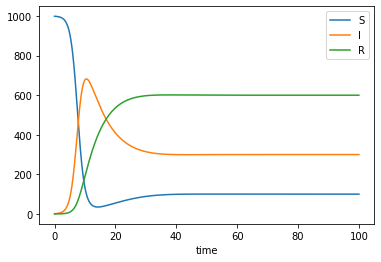

In [6]:
plt.plot(t,S,label='S')
plt.plot(t,I,label='I')
plt.plot(t,R,label='R')
plt.legend()
plt.xlabel('time')
#plt.savefig('SIR_solution.pdf')
plt.show()

### Answer to Question 2

One way to answer this question consists in running our code for a varying immunity loss rate within a realistic range of values. It is a perfectly viable apporach, and provides the right answer.


But there's also an alternative approach that -neglecting the transient- directly provides the values of $S$, $I$, and $R$ at equilibrium. Let's call these limit values $S_\infty$, $I_\infty$, and $R_\infty$ In fact, once $S(t)$, $I(t)$, and $R(t)$ stop changing (i.e. their 'rate of change' is zero) our dynamical equations just become

$$ -cS_\infty I_\infty + lR_\infty = 0 $$

$$ cS_\infty I_\infty -rI_\infty = 0 $$

$$ rI_\infty -lR_\infty = 0 $$

This means $cS_\infty I_\infty=rI_\infty=lR_\infty$, i.e. the flux of individuals from one compartment to another is constant, and in balance. As many people get infected as they recover, as many people recover as they lose their immunity, and as many people lose their immunity as they get infected.

These (now algebraic) equations can be solved easily remembering that the total population $S(t)+I(t)+R(t)=S_\infty+I_\infty+R_\infty = N$ is constant:

$$ S_\infty = \frac{r}{c} 
\qquad , \qquad
I_\infty = \frac{N-r/c}{1+r/l} 
\qquad , \qquad
R_\infty = \frac{N-r/c}{1+l/r}
$$

(Notice that these limit values don't depend on the initial values! Only the transient dynamics does.)

In [7]:
def S_lim(N,c,r,l):
    return r/c

def I_lim(N,c,r,l):
    return (N-r/c)/(1+r/l)

def R_lim(N,c,r,l):
    return (N-r/c)/(1+l/r)

We can compare these values to our numeric results:

In [8]:
N = 1000
c = 0.001
r = 0.1
l = 0.05

print('compartment:','analytic','vs.','numeric')
print('S_lim:',S_lim(N,c,r,l),'vs.',S[-1])
print('I_lim:',I_lim(N,c,r,l),'vs.',I[-1])
print('R_lim:',R_lim(N,c,r,l),'vs.',R[-1])

compartment: analytic vs. numeric
S_lim: 100.0 vs. 100.00002404300069
I_lim: 300.0 vs. 299.9999334909527
R_lim: 600.0 vs. 600.0000424660474


We can plot these limit values for varying $l$:

In [9]:
# Here's some code for sampling on a logarithmic scale.
# It's not strictly necessary, but it increases the readibility of our chart in this case. 
log_l_range = np.linspace(-2,1,100)
l_range = np.power(10,log_l_range)

In [10]:
N = 1000
c = 0.001
r = 0.1

S_lim_values = [S_lim(N,c,r,l) for l in l_range]
I_lim_values = [I_lim(N,c,r,l) for l in l_range]
R_lim_values = [R_lim(N,c,r,l) for l in l_range]

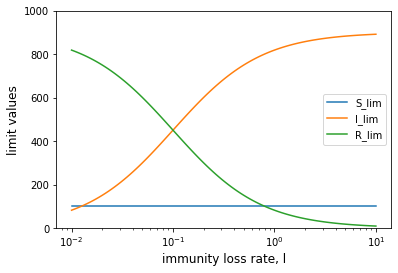

In [11]:
plt.plot(l_range,S_lim_values,label='S_lim')
plt.plot(l_range,I_lim_values,label='I_lim')
plt.plot(l_range,R_lim_values,label='R_lim')
plt.legend()
plt.xlabel('immunity loss rate, l',size=12)
plt.ylabel('limit values',size=12)
plt.xscale('log') # plot on a log-linear scale for better readability, but not strictly necessary
plt.ylim(0,1000)
plt.show()

Notice that the horizontal scale does not correspond to the time coordinate. In this plot we're showing the limit values $S_\infty$, $I_\infty$, and $R_\infty$ for varying $l$ from 0.01 to 10.

$S_\infty$ does not depend on $l$. The remaining $N-S = $ part of the population is split between $I_\infty$ and $R_\infty$, with fractions determined by $l$. Higher values of $l$ correspond (as expected) to higher values of $I_\infty$. 

Also notice that, in the limit for $l\rightarrow 0$, we recover the initial SIR model (i.e. $I_\infty=0$). In the opposite limit -when $l$ dominates over the other two rates- the system behaves like the $R$ compartment was absent, i.e. a steady flux of individuals between $S_\infty$ and $I_\infty$.

### Answer to Question 3
Againg, we could answer this question sampling $l$ values. Alternatively, we can use our limit expression $I$, and set $I_\infty<N/10$. Therefore,

$$ l < \frac{r}{9-\frac{10r}{Nc}} \ , $$ 

that we can now evaluate easily:

In [12]:
l_max = r/(9-10*r/N/c)
print('l_max = ', l_max)

l_max =  0.0125


We can double-check this result by plotting the actual dynamics corresponsing to this value of $l = 0.0125$:

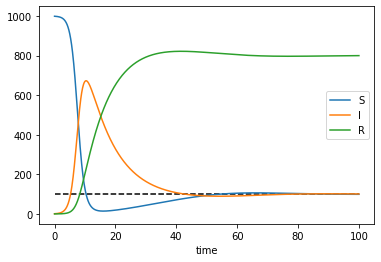

In [13]:
c = 0.001; r = 0.1; l = l_max
S0 = 999; I0 = 1; R0 = 0
x0 = [S0,I0,R0]

def odes(x,t):
    S = x[0]
    I = x[1]
    R = x[2]
    dSdt = -c*I*S + l*R
    dIdt = c*I*S -r*I
    dRdt = r*I - l*R
    return [dSdt,dIdt,dRdt]

t = np.linspace(0,100,1000)
x = odeint(odes,x0,t)

S = x[:,0]; I = x[:,1]; R = x[:,2]

plt.plot([0,100],[100,100],'k--')
plt.plot(t,S,label='S')
plt.plot(t,I,label='I')
plt.plot(t,R,label='R')
plt.legend()
plt.xlabel('time')
plt.show()

The dashed line correponds to 10% of the population (100 individuals in our case).